# **Cat or Dog classifier using CNN**

## Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

# Part 1 - Data Preprocessing

## Preprocessing the Training set
### we using ImageDataGenerator class to image augmentation, and we're doing this because get rid of overfitting.
* rescale - we know that pixels lies between 0 to 255, by dividing 255 to each pixel we make sure that values interval should be 0 to 1(Data Normalizatiom)
* shear_size - it will rotate the Images counter clock-wise
* zoom-range - for zoom in/out of images
* horizontal_flip - values is boolean and randomly flips inputs horizontally

### then we give some parameters to train_datagen object as below
* path - path of training set folder
* target_size - to convert differnt sizes of images to one standard size of image for reduce the computation
* batch_size - how many images in each batch (classic default is 32)
* class_mode - we have a binary outcome(cat or dog) that is why value is binary

### for get more information about parameters [click_here](https://keras.io/api/preprocessing/image/)
### Find Dataset [here](https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/P16-Convolutional-Neural-Networks.zip)

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255,                 
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

training_set = train_datagen.flow_from_directory('../input/cat-or-dog-dataset/dataset/training_set',
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 8000 images belonging to 2 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory('../input/cat-or-dog-dataset/dataset/test_set',
                                            target_size=(64,64),
                                            batch_size=32,
                                            class_mode='binary')

Found 2000 images belonging to 2 classes.


# Part 2 - Building the CNN
## Initializing the CNN

In [4]:
cnn = tf.keras.models.Sequential()

### Step 1- Convolutional layer
* filters,kernels : No of feature detector you want to apply
* kernel_size : An integer or tuple/list of 2 integers, specifying the height and width of 2D convolutional window
* activation : i choose **relu** because rectify the non-linearity of the model
* input_shape : initializing the images 64 by 64 and 3 channels(rgb) which is we already initialized

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=[64,64,3]))

### Step 2 : Pooling
* pool_size - size of frame you want to apply pooling
* strides : No of pixel you want to move

In [6]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

### Adding a second convolutional layer

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

### Adding a third convolutional layer

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

### Step 3 : Flattening
* Flattening is used to converts pooling layers to one dimensional(1D) vector.
* NOTE : no need to specify any parameters


In [9]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 : Full Connection
* that 1D vector will become the input of ann

In [10]:
cnn.add(tf.keras.layers.Dense(units = 152, activation='relu'))

### Step 5 : Output Layer
* units : we need only 1 output neuron since we do binary classification(cat or dog)
* activation : we use sigmoid function because we are doing binary classification

In [11]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [12]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0

### CNN Model Architecture

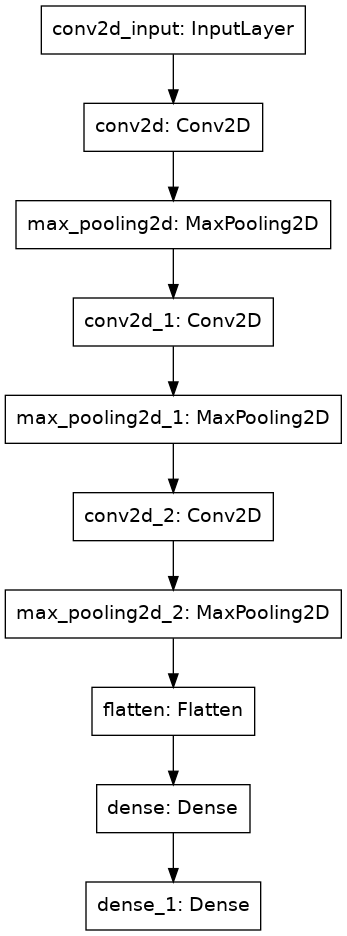

In [13]:
import pydot
keras.utils.plot_model(cnn)

# Part 3 - Training the CNN
## Compiling the CNN
* optimizer : **adam** optimizer which is use stochastic gradient descent to update the weights and reduce the loss(error between actual and predicted values)
* loss : **binary_crossentropy** since we are doing binary classification
* metrics : we choose **accuracy** which is most releavant way to measure the performance of classification model

In [14]:
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Creating a callback object of callbacks.ModelCheckpoint class to store best model out of all

In [15]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

## Training the CNN on the training set and evaluating it on the Test set
* x : training_data
* validation_data : we give test set to validation data
* epochs : no of iteration on given data 

In [16]:
model_history = cnn.fit(x= training_set,
                validation_data=test_set, 
                epochs=30, 
                callbacks=[checkpoint_cb])

Epoch 1/30
250/250 [==============================] - 74s 292ms/step - loss: 0.6914 - accuracy: 0.5250 - val_loss: 0.6524 - val_accuracy: 0.6240
Epoch 2/30
250/250 [==============================] - 50s 201ms/step - loss: 0.6559 - accuracy: 0.6066 - val_loss: 0.6117 - val_accuracy: 0.6860
Epoch 3/30
250/250 [==============================] - 51s 203ms/step - loss: 0.6157 - accuracy: 0.6645 - val_loss: 0.5663 - val_accuracy: 0.7195
Epoch 4/30
250/250 [==============================] - 51s 204ms/step - loss: 0.5791 - accuracy: 0.6902 - val_loss: 0.5655 - val_accuracy: 0.7210
Epoch 5/30
250/250 [==============================] - 50s 201ms/step - loss: 0.5472 - accuracy: 0.7300 - val_loss: 0.5783 - val_accuracy: 0.6960
Epoch 6/30
250/250 [==============================] - 51s 202ms/step - loss: 0.5190 - accuracy: 0.7491 - val_loss: 0.5061 - val_accuracy: 0.7670
Epoch 7/30
250/250 [==============================] - 50s 201ms/step - loss: 0.4913 - accuracy: 0.7564 - val_loss: 0.4925 - val_ac

### NOTE: history method will give you model details at each epoch.

Text(0, 0.5, 'Accuracy')

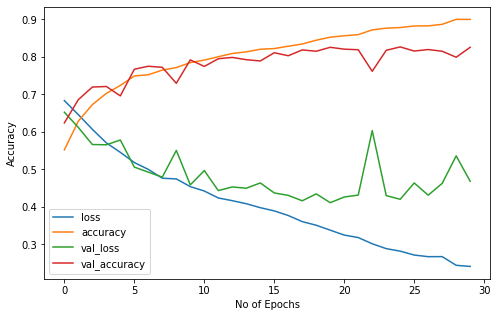

In [17]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')

# Part 4 - Making a single prediction

### we set throshold to 0.5, if model's predicted value is more than 0.5 than its dog otherwise it's cat
###   result > 0.5, Dog
###   result < 0.5, Cat
* closer to 1 higher the chance of dog
* closer to 0 higher the chance of cat
* Example1 : if model predict 0.4 than its cat because we set threshold to 0.5 but we are not that much confident since 0.4 are not that much closer to 0
* Example2 : if model predict 0.9 than its dog and we are very much confident about our result because we are much closer to 1.

In [18]:
test_image = image.load_img('../input/cat-or-dog-dataset/dataset/single_prediction/cat_or_dog_2.jpg',target_size=(64,64))
test_image = image.img_to_array(test_image)
test_image = test_image/255.
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)
training_set.class_indices

if result[0][0] > 0.5:
    prediction = 'dog'
    x = round((result[0][0])*100)
    print("dog :",x, "%")
    print("cat :",100-x,"%")
else:
    prediction = 'cat'
    y = round((1 - result[0][0])*100)
    print("cat", y, "%")
    print("dog", 100-y, "%")

cat 96 %
dog 4 %
